In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn import preprocessing
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Read Data

In [2]:
df = pd.read_csv('./data/winequality-white.csv',';')

D:\python\anaconda\envs\ML\lib\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Plot Targent data division

D:\python\anaconda\envs\ML\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


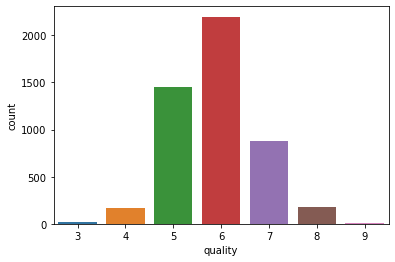

D:\python\anaconda\envs\ML\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='quality', ylabel='count'>

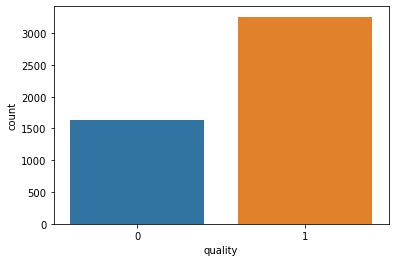

In [4]:
sns.countplot(df['quality'])
plt.show()

df['quality'] = np.where(df['quality'] > 5, 1, 0)
quality_count=df['quality'].value_counts(normalize=True)
sns.countplot(df['quality'])

In [5]:
patients_count=df['quality'].value_counts(normalize=True)

In [6]:
patients_count

1    0.665169
0    0.334831
Name: quality, dtype: float64

# Preprocess the data

In [7]:
X = df.drop(['quality'], axis=1)
scaler = StandardScaler()
# transform data
X = scaler.fit_transform(X)
plt.show()
y=df['quality']
y = y.astype(int)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

# Decision Tree

In [9]:
#Initialize the decision tree with default parameters
clf = tree.DecisionTreeClassifier(criterion='entropy',splitter='best', max_depth=None, min_samples_split=2,
                                     max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,class_weight='balanced')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### Print Accuracy, F1 score, Recall score, ROC curve and Confusion matrix.

Accuracy score: 0.7918367346938775
f1 score : 0.8449848024316109
f1 score Micro: 0.7918367346938775
f1 score Macro: 0.7641073080481036
f1 score Weighted: 0.7915066224719041
Precision Score: 0.8424242424242424
average_precision_score: 0.8160467291129312
balanced_accuracy_score: 0.7632866606443842
confusion_matrix: [[220 104]
 [100 556]]
recall score: 0.8475609756097561


Text(0.5, 1.0, 'ROC curve: ')

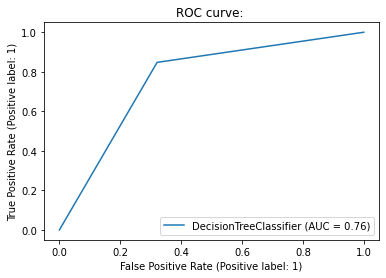

In [10]:
print("Accuracy score:",metrics.accuracy_score(y_test, y_pred))
print("f1 score :",metrics.f1_score(y_test, y_pred))
print("f1 score Micro:",metrics.f1_score(y_test, y_pred,average='micro'))
print("f1 score Macro:",metrics.f1_score(y_test, y_pred,average='macro'))
print("f1 score Weighted:",metrics.f1_score(y_test, y_pred,average='weighted'))
print("Precision Score:",metrics.precision_score(y_test, y_pred))
print("average_precision_score:",metrics.average_precision_score(y_test, y_pred))
print("balanced_accuracy_score:",metrics.balanced_accuracy_score(y_test, y_pred))
print("confusion_matrix:",metrics.confusion_matrix(y_test, y_pred))
print("recall score:",metrics.recall_score(y_test, y_pred))
rocCurve = metrics.plot_roc_curve(clf, X_test, y_test)
rocCurveTitle = 'ROC curve: '
rocCurve.ax_.set_title(rocCurveTitle)

In [11]:
print(clf.tree_.max_depth)

24


In [12]:
tree_parameters = {'max_depth' : np.arange(1,26)}
clf_tuned = GridSearchCV(clf, tree_parameters, scoring=None, n_jobs=2, refit=True, cv=5, 
                       verbose=0, pre_dispatch='2*n_jobs', error_score=np.nan, return_train_score=True)
clf_tuned.fit(X_train, y_train)
clf_tuned.best_params_

{'max_depth': 19}

In [13]:
clf_tuned = tree.DecisionTreeClassifier(criterion='entropy',splitter='best', max_depth=22, min_samples_split=2,
                                     max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,class_weight='balanced')

# Train Decision Tree Classifer
clf_tuned = clf_tuned.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf_tuned.predict(X_test)

### Print Accuracy, F1 scores, Recall score, ROC curve and Confusion matrix.

Accuracy score: 0.7826530612244897
f1 score : 0.838514025777104
f1 score Micro: 0.7826530612244896
f1 score Macro: 0.7531103670227174
f1 score Weighted: 0.78204303509053
Precision Score: 0.8340874811463047
average_precision_score: 0.8082276156241108
balanced_accuracy_score: 0.7517408160192713
confusion_matrix: [[214 110]
 [103 553]]
recall score: 0.8429878048780488


Text(0.5, 1.0, 'ROC curve: ')

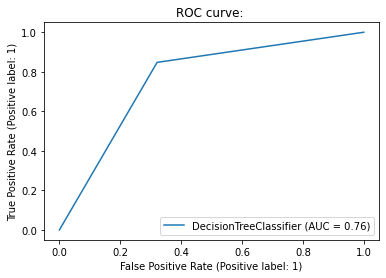

In [14]:
print("Accuracy score:",metrics.accuracy_score(y_test, y_pred))
print("f1 score :",metrics.f1_score(y_test, y_pred))
print("f1 score Micro:",metrics.f1_score(y_test, y_pred,average='micro'))
print("f1 score Macro:",metrics.f1_score(y_test, y_pred,average='macro'))
print("f1 score Weighted:",metrics.f1_score(y_test, y_pred,average='weighted'))
print("Precision Score:",metrics.precision_score(y_test, y_pred))
print("average_precision_score:",metrics.average_precision_score(y_test, y_pred))
print("balanced_accuracy_score:",metrics.balanced_accuracy_score(y_test, y_pred))
print("confusion_matrix:",metrics.confusion_matrix(y_test, y_pred))
print("recall score:",metrics.recall_score(y_test, y_pred))
rocCurve = metrics.plot_roc_curve(clf, X_test, y_test)
rocCurveTitle = 'ROC curve: '
rocCurve.ax_.set_title(rocCurveTitle)

#### Decision Tree Learning Curve

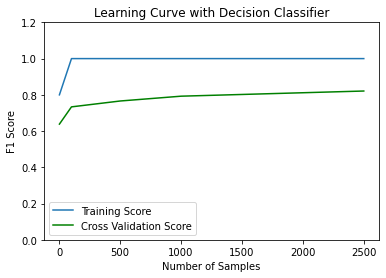

In [63]:
#Decided size as per the sample size, above 6000 is erroring out
parameter_range = [1, 100,500,1000,2500]

dt_train_sizes, dt_train_scores, dt_valid_scores,dt_fit_times,dt_score_times = learning_curve(clf, X_train,y_train,train_sizes =parameter_range, cv = 5, scoring = "f1",n_jobs=5,return_times=True)

# Calculating mean deviation of train score
mean_train_score = np.mean(dt_train_scores, axis = 1)

# Calculating mean deviation of test score
mean_test_score = np.mean(dt_valid_scores, axis = 1)
 
plt.plot(dt_train_sizes,mean_train_score,label='Training Score')
plt.plot(dt_train_sizes,mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Learning Curve with Decision Classifier")
plt.xlabel("Number of Samples")
plt.ylabel("F1 Score")
plt.ylim(0.0, 1.2)
plt.legend(loc = 'best')
#plt.xlim(0, 1000)
plt.show()

#### Decision Tree Validation Curve

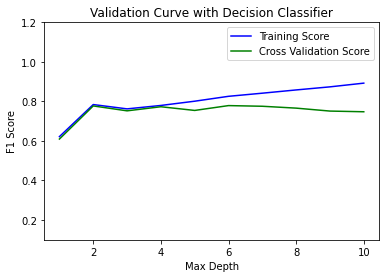

In [64]:
depth = np.arange(1,11)
 
train_score, test_score = validation_curve(clf, X, y,
                                       param_name = "max_depth",
                                       param_range = depth,
                                        cv = 5, scoring = "f1", n_jobs=5)

# Calculating mean deviation of train score
mean_train_score = np.mean(train_score, axis = 1)
 
# Calculating mean deviation of test score    
mean_test_score = np.mean(test_score, axis = 1)
 
plt.plot(depth, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(depth, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with Decision Classifier")
plt.xlabel("Max Depth")
plt.ylabel("F1 Score")
plt.ylim(0.1, 1.2)
#plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

# Neural Network

In [18]:
#Initialize the Neural Network with default parameters and two hidden layers
clf_nn = MLPClassifier(hidden_layer_sizes=(8, 4))
clf_nn.fit(X_train, y_train)
y_pred_nn = clf_nn.predict(X_test)
clf_nn.get_params().keys()

D:\python\anaconda\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

### Print Accuracy, F1 score, Recall score, ROC curve and Confusion matrix.

Accuracy score: 0.7581632653061224
f1 score : 0.8240534521158129
f1 score Micro: 0.7581632653061224
f1 score Macro: 0.7187151436761773
f1 score Weighted: 0.7544011828618498
Precision Score: 0.8031837916063675
average_precision_score: 0.7825840969616465
balanced_accuracy_score: 0.7131417494730503
confusion_matrix: [[188 136]
 [101 555]]
recall score: 0.8460365853658537


Text(0.5, 1.0, 'ROC curve: ')

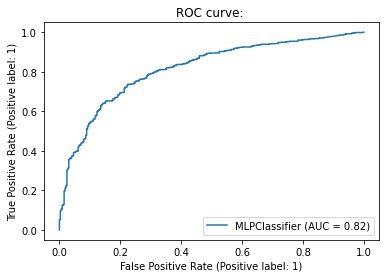

In [20]:
print("Accuracy score:",metrics.accuracy_score(y_test, y_pred_nn))
print("f1 score :",metrics.f1_score(y_test, y_pred_nn))
print("f1 score Micro:",metrics.f1_score(y_test, y_pred_nn,average='micro'))
print("f1 score Macro:",metrics.f1_score(y_test, y_pred_nn,average='macro'))
print("f1 score Weighted:",metrics.f1_score(y_test, y_pred_nn,average='weighted'))
print("Precision Score:",metrics.precision_score(y_test, y_pred_nn))
print("average_precision_score:",metrics.average_precision_score(y_test, y_pred_nn))
print("balanced_accuracy_score:",metrics.balanced_accuracy_score(y_test, y_pred_nn))
print("confusion_matrix:",metrics.confusion_matrix(y_test, y_pred_nn))
print("recall score:",metrics.recall_score(y_test, y_pred_nn))
rocCurve = metrics.plot_roc_curve(clf_nn, X_test, y_test)
rocCurveTitle = 'ROC curve: '
rocCurve.ax_.set_title(rocCurveTitle)

In [21]:
activation_funcs = ['sigmoid', 'relu', 'tanh'] 
max_iterations=[10,50,100,200,500,1000]
param_grid = dict( activation = activation_funcs,  max_iter=max_iterations)
clf_nn_tuned = GridSearchCV(clf_nn, param_grid = param_grid,scoring=None, n_jobs=2, refit=True, cv=5, 
                       verbose=0, pre_dispatch='2*n_jobs', error_score=np.nan, return_train_score=True)
clf_nn_tuned.fit(X_train, y_train)
clf_nn_tuned.best_params_

D:\python\anaconda\envs\ML\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
 0.69321715 0.75777882 0.76544296 0.76952264 0.77207822 0.76824485
 0.69242122 0.7595691  0.77590507 0.76977383 0.77538998 0.76977774]
  category=UserWarning
D:\python\anaconda\envs\ML\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the train scores are non-finite: [       nan        nan        nan        nan        nan        nan
 0.6914859  0.77035516 0.78375406 0.78796528 0.79441029 0.79798453
 0.7002357  0.769334   0.77947956 0.79013458 0.80372581 0.80168487]
  category=UserWarning
D:\python\anaconda\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'activation': 'tanh', 'max_iter': 100}

In [22]:
#Apply the best hyper tune parameters from the above tuning
clf_nn_tuned = MLPClassifier(activation='relu', max_iter=200)
clf_nn_tuned.fit(X_train, y_train)
y_pred_nn_tuned = clf_nn_tuned.predict(X_test)

D:\python\anaconda\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy score: 0.7887755102040817
f1 score : 0.8474576271186439
f1 score Micro: 0.7887755102040817
f1 score Macro: 0.7520870225145458
f1 score Weighted: 0.7843962477477708
Precision Score: 0.8202567760342369
average_precision_score: 0.8016281316813284
balanced_accuracy_score: 0.7438177506775068
confusion_matrix: [[198 126]
 [ 81 575]]
recall score: 0.8765243902439024


Text(0.5, 1.0, 'ROC curve: ')

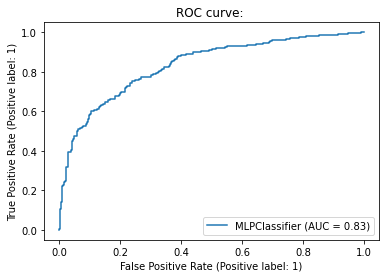

In [23]:
print("Accuracy score:",metrics.accuracy_score(y_test, y_pred_nn_tuned))
print("f1 score :",metrics.f1_score(y_test, y_pred_nn_tuned))
print("f1 score Micro:",metrics.f1_score(y_test, y_pred_nn_tuned,average='micro'))
print("f1 score Macro:",metrics.f1_score(y_test, y_pred_nn_tuned,average='macro'))
print("f1 score Weighted:",metrics.f1_score(y_test, y_pred_nn_tuned,average='weighted'))
print("Precision Score:",metrics.precision_score(y_test, y_pred_nn_tuned))
print("average_precision_score:",metrics.average_precision_score(y_test, y_pred_nn_tuned))
print("balanced_accuracy_score:",metrics.balanced_accuracy_score(y_test, y_pred_nn_tuned))
print("confusion_matrix:",metrics.confusion_matrix(y_test, y_pred_nn_tuned))
print("recall score:",metrics.recall_score(y_test, y_pred_nn_tuned))
rocCurve = metrics.plot_roc_curve(clf_nn_tuned, X_test, y_test)
rocCurveTitle = 'ROC curve: '
rocCurve.ax_.set_title(rocCurveTitle)

#### Neural Network Learning Curve

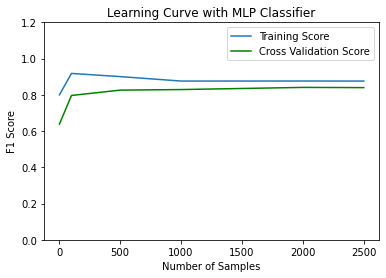

In [25]:
parameter_range = [1, 100,500,1000,2000,2500]
nn_train_sizes, nn_train_scores, nn_valid_scores,nn_fit_times,nn_score_times= learning_curve(clf_nn_tuned, X_train, y_train, train_sizes =parameter_range,
                                                                  cv=5,scoring='f1',n_jobs=5,return_times=True)

# Calculating mean deviation of train score
mean_train_score = np.mean(nn_train_scores, axis = 1)

# Calculating mean deviation of testing score
mean_test_score = np.mean(nn_valid_scores, axis = 1)

plt.plot(nn_train_sizes,mean_train_score,label='Training Score')
plt.plot(nn_train_sizes,mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Learning Curve with MLP Classifier")
plt.xlabel("Number of Samples")
plt.ylabel("F1 Score")
plt.ylim(0.0, 1.2)
plt.legend(loc = 'best')
#plt.xlim(0, 1000)
plt.show()

#### Neural Network Validation Curve

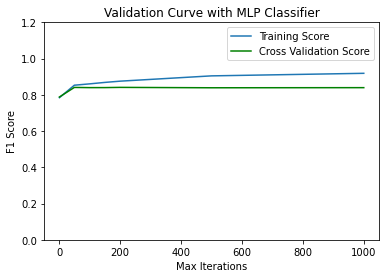

In [27]:
maxIterParam = [1,50,100,150,200,500,1000]
#hidden_layer_sizes=(30,30,30)
nn_train_scores, nn_test_scores = validation_curve(clf_nn_tuned, X_train, y_train, param_name="max_iter", 
                                             param_range=maxIterParam, cv=5, scoring='f1', n_jobs=4)
# Calculating mean deviation of train score
mean_train_score = np.mean(nn_train_scores, axis = 1)
 
# Calculating mean deviation of testing score
mean_test_score = np.mean(nn_test_scores, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(maxIterParam,mean_train_score,label='Training Score')
plt.plot(maxIterParam,mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with MLP Classifier")
plt.xlabel("Max Iterations")
plt.ylabel("F1 Score")
plt.ylim(0.0, 1.2)
plt.legend(loc = 'best')
#plt.xlim(0, 1000)
plt.show()

### Boosting

In [29]:
d_clf = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
clf_adaboost = AdaBoostClassifier(base_estimator=d_clf)
clf_adaboost.fit(X_train, y_train)
y_pred_adaboost = clf_adaboost.predict(X_test)
clf_adaboost.get_params().keys()

dict_keys(['algorithm', 'base_estimator__ccp_alpha', 'base_estimator__class_weight', 'base_estimator__criterion', 'base_estimator__max_depth', 'base_estimator__max_features', 'base_estimator__max_leaf_nodes', 'base_estimator__min_impurity_decrease', 'base_estimator__min_impurity_split', 'base_estimator__min_samples_leaf', 'base_estimator__min_samples_split', 'base_estimator__min_weight_fraction_leaf', 'base_estimator__random_state', 'base_estimator__splitter', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

### Print Accuracy, F1 score, Recall score, ROC curve and Confusion matrix.

Accuracy score: 0.753061224489796
f1 score : 0.8204747774480712
f1 score Micro: 0.753061224489796
f1 score Macro: 0.712524970423382
f1 score Weighted: 0.7490957213746032
Precision Score: 0.7991329479768786
average_precision_score: 0.7787613704370795
balanced_accuracy_score: 0.7069877295995182
confusion_matrix: [[185 139]
 [103 553]]
recall score: 0.8429878048780488


Text(0.5, 1.0, 'ROC curve: ')

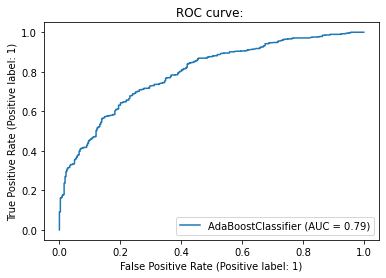

In [31]:
print("Accuracy score:",metrics.accuracy_score(y_test, y_pred_adaboost))
print("f1 score :",metrics.f1_score(y_test, y_pred_adaboost))
print("f1 score Micro:",metrics.f1_score(y_test, y_pred_adaboost,average='micro'))
print("f1 score Macro:",metrics.f1_score(y_test, y_pred_adaboost,average='macro'))
print("f1 score Weighted:",metrics.f1_score(y_test, y_pred_adaboost,average='weighted'))
print("Precision Score:",metrics.precision_score(y_test, y_pred_adaboost))
print("average_precision_score:",metrics.average_precision_score(y_test, y_pred_adaboost))
print("balanced_accuracy_score:",metrics.balanced_accuracy_score(y_test, y_pred_adaboost))
print("confusion_matrix:",metrics.confusion_matrix(y_test, y_pred_adaboost))
print("recall score:",metrics.recall_score(y_test, y_pred_adaboost))
rocCurve = metrics.plot_roc_curve(clf_adaboost, X_test, y_test)
rocCurveTitle = 'ROC curve: '
rocCurve.ax_.set_title(rocCurveTitle)

#### Tune Adaboost Classifier

In [33]:
tuningParams = {'learning_rate' :  np.arange(0.1,2.0), 'n_estimators': [10,20,30,40,50,60,70,80,90,100,200,500]}
clf_nn_ad = GridSearchCV(clf_adaboost, tuningParams, scoring=None, n_jobs=2, refit=True, cv=5, 
                       verbose=0, pre_dispatch='2*n_jobs',  return_train_score=True)
clf_nn_ad.fit(X_train, y_train)
clf_nn_ad.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [34]:
#Apply the best hyper tune parameters from the above tuning
clf_adaboost_tuned = AdaBoostClassifier(base_estimator=d_clf, learning_rate= .1, n_estimators=500)
clf_adaboost_tuned.fit(X_train, y_train)
y_pred_boost_tuned = clf_adaboost_tuned.predict(X_test)

### Print Accuracy, F1 score, Recall score, ROC curve and Confusion matrix.

Accuracy score: 0.7581632653061224
f1 score : 0.8283852280955829
f1 score Micro: 0.7581632653061224
f1 score Macro: 0.7095294016125583
f1 score Weighted: 0.7497948448700728
Precision Score: 0.7889655172413793
average_precision_score: 0.7736537306259762
balanced_accuracy_score: 0.6998644986449865
confusion_matrix: [[171 153]
 [ 84 572]]
f1 score: 0.8283852280955829
recall score: 0.8719512195121951
ROC AUC Curve: 0.6998644986449865


Text(0.5, 1.0, 'ROC curve: ')

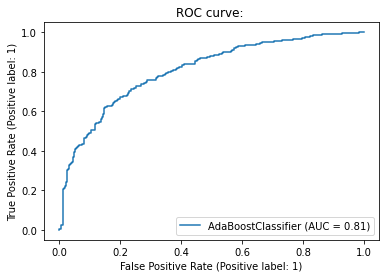

In [36]:
print("Accuracy score:",metrics.accuracy_score(y_test, y_pred_boost_tuned))
print("f1 score :",metrics.f1_score(y_test, y_pred_boost_tuned))
print("f1 score Micro:",metrics.f1_score(y_test, y_pred_boost_tuned,average='micro'))
print("f1 score Macro:",metrics.f1_score(y_test, y_pred_boost_tuned,average='macro'))
print("f1 score Weighted:",metrics.f1_score(y_test, y_pred_boost_tuned,average='weighted'))
print("Precision Score:",metrics.precision_score(y_test, y_pred_boost_tuned))
print("average_precision_score:",metrics.average_precision_score(y_test, y_pred_boost_tuned))
print("balanced_accuracy_score:",metrics.balanced_accuracy_score(y_test, y_pred_boost_tuned))
print("confusion_matrix:",metrics.confusion_matrix(y_test, y_pred_boost_tuned))
print("f1 score:",metrics.f1_score(y_test, y_pred_boost_tuned))
print("recall score:",metrics.recall_score(y_test, y_pred_boost_tuned))
print("ROC AUC Curve:",metrics.roc_auc_score(y_test, y_pred_boost_tuned))
rocCurve = metrics.plot_roc_curve(clf_adaboost_tuned, X_test, y_test)
rocCurveTitle = 'ROC curve: '
rocCurve.ax_.set_title(rocCurveTitle)

#### Adaboost Learning Curve

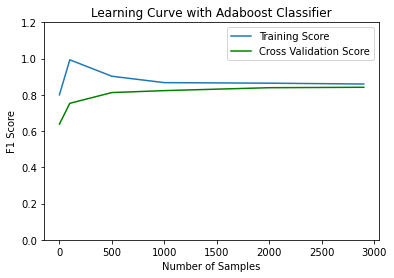

In [38]:
parameter_range = [1, 100,500,1000,2000,2900]
adaboost_train_sizes, adaboost_train_scores, adaboost_valid_scores,adaboost_fit_times,adaboost_score_times = learning_curve(clf_adaboost_tuned, X_train, y_train, train_sizes=parameter_range,cv=5, scoring='f1',n_jobs=5,return_times=True)

# Calculating mean deviation of train score
mean_train_score = np.mean(adaboost_train_scores, axis = 1)
 
# Calculating mean deviation of testing score
mean_test_score = np.mean(adaboost_valid_scores, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(adaboost_train_sizes,mean_train_score,label='Training Score')
plt.plot(adaboost_train_sizes,mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Learning Curve with Adaboost Classifier")
plt.xlabel("Number of Samples")
plt.ylabel("F1 Score")
plt.ylim(0.0, 1.2)
plt.legend(loc = 'best')
#plt.xlim(0, 1000)
plt.show()

#### Adaboost Validation Curve

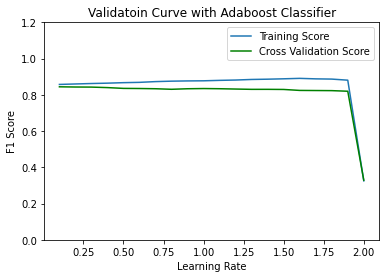

In [39]:
learningRate =  np.linspace(0.1,2.0,20)
adabst_train_scores, adabst_valid_scores = validation_curve(clf_adaboost_tuned, X_train, y_train, param_name="learning_rate", param_range=learningRate, scoring='f1', cv=5)

# Calculating mean deviation of train score
mean_train_score = np.mean(adabst_train_scores, axis = 1)

 
# Calculating mean  deviation of testing score
mean_test_score = np.mean(adabst_valid_scores, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(learningRate,mean_train_score,label='Training Score')
plt.plot(learningRate,mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validatoin Curve with Adaboost Classifier")
plt.xlabel("Learning Rate")
plt.ylabel("F1 Score")
plt.legend(loc = 'best')
plt.ylim(0.0, 1.2)
plt.show()

# SVM

In [9]:
#running with default kernel rbf
clf_svm = svm.SVC(kernel='rbf')
clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)
clf_svm.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

### Print Accuracy, F1 score, Recall score, ROC curve and Confusion matrix.

Accuracy score: 0.7724489795918368
f1 score : 0.8385228095582911
f1 score Micro: 0.7724489795918368
f1 score Macro: 0.7266880023611835
f1 score Weighted: 0.7645748962279587
Precision Score: 0.7986206896551724
average_precision_score: 0.7834515799591494
balanced_accuracy_score: 0.7160023336344474
confusion_matrix: [[178 146]
 [ 77 579]]
f1 score: 0.8385228095582911
recall score: 0.8826219512195121
ROC AUC Curve: 0.7160023336344474


Text(0.5, 1.0, 'ROC curve: ')

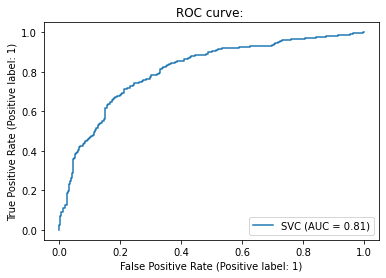

In [10]:
print("Accuracy score:",metrics.accuracy_score(y_test, y_pred_svm))
print("f1 score :",metrics.f1_score(y_test, y_pred_svm))
print("f1 score Micro:",metrics.f1_score(y_test, y_pred_svm,average='micro'))
print("f1 score Macro:",metrics.f1_score(y_test, y_pred_svm,average='macro'))
print("f1 score Weighted:",metrics.f1_score(y_test, y_pred_svm,average='weighted'))
print("Precision Score:",metrics.precision_score(y_test, y_pred_svm))
print("average_precision_score:",metrics.average_precision_score(y_test, y_pred_svm))
print("balanced_accuracy_score:",metrics.balanced_accuracy_score(y_test, y_pred_svm))
print("confusion_matrix:",metrics.confusion_matrix(y_test, y_pred_svm))
print("f1 score:",metrics.f1_score(y_test, y_pred_svm))
print("recall score:",metrics.recall_score(y_test, y_pred_svm))
print("ROC AUC Curve:",metrics.roc_auc_score(y_test, y_pred_svm))
rocCurve = metrics.plot_roc_curve(clf_svm, X_test, y_test)
rocCurveTitle = 'ROC curve: '
rocCurve.ax_.set_title(rocCurveTitle)

#### Tune the SVC Classifer

In [11]:
#tuningParams = {'C' :  [ 1, 10,25,50, 100],'max_iter' :  [10,50,100,200,500,1000], 'degree':[1,2,3,4,5,6]}
tuningParams = {'C' :  [ 1, 10,25,50, 100]}
#tuningParams = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
clf_svc_tuned = GridSearchCV(clf_svm, tuningParams, scoring=None, n_jobs=2, refit=True, cv=5, 
                       verbose=0, pre_dispatch='2*n_jobs', error_score=np.nan, return_train_score=True)
clf_svc_tuned.fit(X_train, y_train)
clf_svc_tuned.best_params_

{'kernel': 'rbf'}

In [43]:
#Apply the best hyper tune parameters from the above tuning
#clf_svc_tuned = svm.SVC(C= 1, degree=1,max_iter=1000)
clf_svc_tuned = svm.SVC(C= 1,kernel='rbf')
clf_svc_tuned.fit(X_train, y_train)
y_pred_svm_tuned = clf_svc_tuned.predict(X_test)

D:\python\anaconda\envs\ML\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


### Print Accuracy, F1 score, Recall score, ROC curve and Confusion matrix.

In [44]:
print("Accuracy score:",metrics.accuracy_score(y_test, y_pred_svm_tuned))
print("f1 score :",metrics.f1_score(y_test, y_pred_svm_tuned))
print("f1 score Micro:",metrics.f1_score(y_test, y_pred_svm_tuned,average='micro'))
print("f1 score Macro:",metrics.f1_score(y_test, y_pred_svm_tuned,average='macro'))
print("f1 score Weighted:",metrics.f1_score(y_test, y_pred_svm_tuned,average='weighted'))
print("Precision Score:",metrics.precision_score(y_test, y_pred_svm_tuned))
print("average_precision_score:",metrics.average_precision_score(y_test, y_pred_svm_tuned))
print("balanced_accuracy_score:",metrics.balanced_accuracy_score(y_test, y_pred_svm_tuned))
print("confusion_matrix:",metrics.confusion_matrix(y_test, y_pred_svm_tuned))
print("f1 score:",metrics.f1_score(y_test, y_pred_svm_tuned))
print("recall score:",metrics.recall_score(y_test, y_pred_svm_tuned))
print("ROC AUC Curve:",metrics.roc_auc_score(y_test, y_pred_svm_tuned))
rocCurveTitle = 'ROC curve: '
rocCurve.ax_.set_title(rocCurveTitle)

Accuracy score: 0.7704081632653061
f1 score : 0.8373101952277657
f1 score Micro: 0.7704081632653061
f1 score Macro: 0.7236810941476783
f1 score Weighted: 0.7621758508401161
Precision Score: 0.796423658872077
average_precision_score: 0.7815124323624844
balanced_accuracy_score: 0.712915913881361
confusion_matrix: [[176 148]
 [ 77 579]]
f1 score: 0.8373101952277657
recall score: 0.8826219512195121
ROC AUC Curve: 0.712915913881361


Text(0.5, 1.0, 'ROC curve: ')

#### SVM Learning Curve

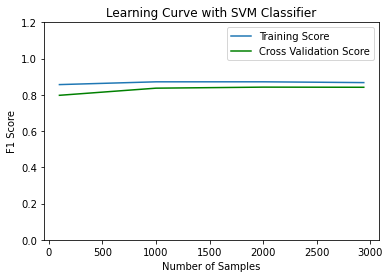

In [45]:
parameter_range = [1, 100,1000,2000,2938]
svm_train_sizes, svm_train_scores, svm_valid_scores,svm_fit_times,svm_score_times = learning_curve(clf_svc_tuned, X_train, y_train, train_sizes=parameter_range,
                                                                     cv=5, scoring='f1',n_jobs=5,return_times=True)
# Calculating mean deviation of train score
mean_train_score = np.mean(svm_train_scores, axis = 1)
 
# Calculating mean deviation of testing score
mean_test_score = np.mean(svm_valid_scores, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(svm_train_sizes,mean_train_score,label='Training Score')
plt.plot(svm_train_sizes,mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Learning Curve with SVM Classifier")
plt.xlabel("Number of Samples")
plt.ylabel("F1 Score")
plt.legend(loc = 'best')
plt.ylim(0.0, 1.2)
plt.show()

#### SVM Validation Curve

D:\python\anaconda\envs\ML\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
D:\python\anaconda\envs\ML\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
D:\python\anaconda\envs\ML\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
D:\python\anaconda\envs\ML\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
D:\python\anaconda\envs\ML\l

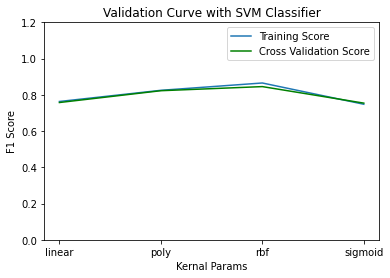

In [46]:
kernelparam = ['linear', 'poly', 'rbf', 'sigmoid']
train_scores, test_scores = validation_curve(clf_svc_tuned, X_train, y_train, param_name="kernel", param_range=kernelparam, scoring='f1', cv=5)
# Calculating mean deviation of train score
mean_train_score = np.mean(train_scores, axis = 1)
 
# Calculating mean deviation of testing score
mean_test_score = np.mean(test_scores, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(kernelparam,mean_train_score,label='Training Score')
plt.plot(kernelparam,mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with SVM Classifier")
plt.xlabel("Kernal Params")
plt.ylabel("F1 Score")
plt.legend(loc = 'best')
plt.ylim(0.0, 1.2)
plt.show()

# k-nearest neighbors 

In [47]:
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train,y_train)
y_pred_knn = clf_knn.predict(X_test)

### Print Accuracy, F1 score, Recall score, ROC curve and Confusion matrix.

Accuracy score: 0.7622448979591837
f1 score : 0.8295537673738113
f1 score Micro: 0.7622448979591837
f1 score Macro: 0.7183181990326055
f1 score Weighted: 0.7560020854502385
Precision Score: 0.7974683544303798
average_precision_score: 0.7800915658019923
balanced_accuracy_score: 0.7099424119241193
confusion_matrix: [[180 144]
 [ 89 567]]
f1 score: 0.8295537673738113
recall score: 0.864329268292683
ROC AUC Curve: 0.7099424119241193


Text(0.5, 1.0, 'ROC curve: ')

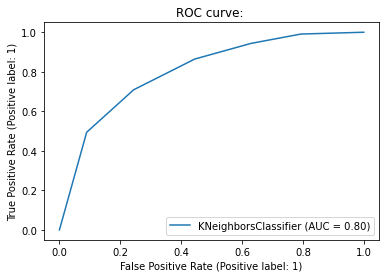

In [48]:
print("Accuracy score:",metrics.accuracy_score(y_test, y_pred_knn))
print("f1 score :",metrics.f1_score(y_test, y_pred_knn))
print("f1 score Micro:",metrics.f1_score(y_test, y_pred_knn,average='micro'))
print("f1 score Macro:",metrics.f1_score(y_test, y_pred_knn,average='macro'))
print("f1 score Weighted:",metrics.f1_score(y_test, y_pred_knn,average='weighted'))
print("Precision Score:",metrics.precision_score(y_test, y_pred_knn))
print("average_precision_score:",metrics.average_precision_score(y_test, y_pred_knn))
print("balanced_accuracy_score:",metrics.balanced_accuracy_score(y_test, y_pred_knn))
print("confusion_matrix:",metrics.confusion_matrix(y_test, y_pred_knn))
print("f1 score:",metrics.f1_score(y_test, y_pred_knn))
print("recall score:",metrics.recall_score(y_test, y_pred_knn))
print("ROC AUC Curve:",metrics.roc_auc_score(y_test, y_pred_knn))
rocCurve = metrics.plot_roc_curve(clf_knn, X_test, y_test)
rocCurveTitle = 'ROC curve: '
rocCurve.ax_.set_title(rocCurveTitle)

#### Tune the KNN Classifer

In [49]:
tuningParams = {'n_neighbors': np.arange(1, 101)}
clf_knn_tuned = GridSearchCV(clf_knn, tuningParams, scoring=None, n_jobs=2, refit=True, cv=5, 
                       verbose=0, pre_dispatch='2*n_jobs', error_score=np.nan, return_train_score=True)
clf_knn_tuned.fit(X_train, y_train)
clf_knn_tuned.best_params_

{'n_neighbors': 1}

In [50]:
#Apply the best hyper tune parameters from the above tuning
clf_knn_tuned = KNeighborsClassifier(n_neighbors=1)
clf_knn_tuned.fit(X_train,y_train)
y_pred_knn_tuned = clf_knn_tuned.predict(X_test)

### Print Accuracy, F1 score, Recall score, ROC curve and Confusion matrix.

Accuracy score: 0.8091836734693878
f1 score : 0.858867924528302
f1 score Micro: 0.8091836734693878
f1 score Macro: 0.782189867775962
f1 score Weighted: 0.8081665155736936
Precision Score: 0.8505231689088192
average_precision_score: 0.8265006368948105
balanced_accuracy_score: 0.7793680367359229
confusion_matrix: [[224 100]
 [ 87 569]]
f1 score: 0.858867924528302
recall score: 0.8673780487804879
ROC AUC Curve: 0.7793680367359229


Text(0.5, 1.0, 'ROC curve: ')

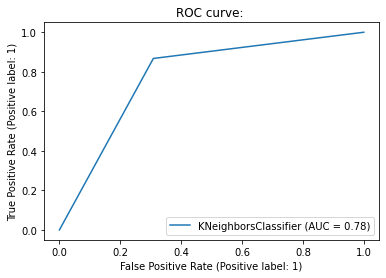

In [51]:
print("Accuracy score:",metrics.accuracy_score(y_test, y_pred_knn_tuned))
print("f1 score :",metrics.f1_score(y_test, y_pred_knn_tuned))
print("f1 score Micro:",metrics.f1_score(y_test, y_pred_knn_tuned,average='micro'))
print("f1 score Macro:",metrics.f1_score(y_test, y_pred_knn_tuned,average='macro'))
print("f1 score Weighted:",metrics.f1_score(y_test, y_pred_knn_tuned,average='weighted'))
print("Precision Score:",metrics.precision_score(y_test, y_pred_knn_tuned))
print("average_precision_score:",metrics.average_precision_score(y_test, y_pred_knn_tuned))
print("balanced_accuracy_score:",metrics.balanced_accuracy_score(y_test, y_pred_knn_tuned))
print("confusion_matrix:",metrics.confusion_matrix(y_test, y_pred_knn_tuned))
print("f1 score:",metrics.f1_score(y_test, y_pred_knn_tuned))
print("recall score:",metrics.recall_score(y_test, y_pred_knn_tuned))
print("ROC AUC Curve:",metrics.roc_auc_score(y_test, y_pred_knn_tuned))
rocCurve = metrics.plot_roc_curve(clf_knn_tuned, X_test, y_test)
rocCurveTitle = 'ROC curve: '
rocCurve.ax_.set_title(rocCurveTitle)

#### KNN Learning Curve

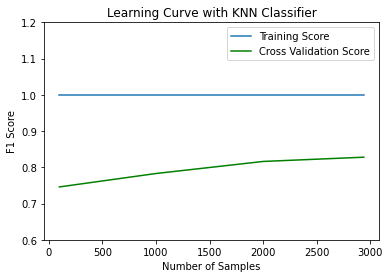

In [52]:
parameter_range = [100,1000,2000,2938]
knn_train_sizes, knn_train_scores, knn_valid_scores,knn_fit_times,knn_score_times = learning_curve(clf_knn_tuned, X_train, y_train, train_sizes=parameter_range, cv=5, scoring='f1',n_jobs=5,return_times=True)

# Mean deviation of train score
mean_train_score = np.mean(knn_train_scores, axis = 1)
 
# Mean deviation of testing score
mean_test_score = np.mean(knn_valid_scores, axis = 1)
 
# Plot mean F1 scores for training and testing scores
plt.plot(knn_train_sizes,mean_train_score,label='Training Score')
plt.plot(knn_train_sizes,mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Learning Curve with KNN Classifier")
plt.xlabel("Number of Samples")
plt.ylabel("F1 Score")
plt.legend(loc = 'best')
plt.ylim(0.6, 1.2)
plt.show()

#### KNN Validation Curve

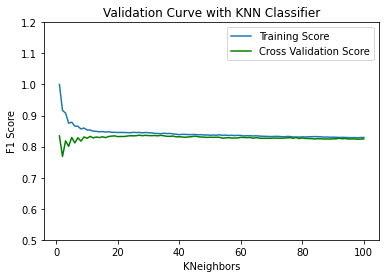

In [53]:
neighborsParam = np.arange(1, 101)
train_scores, test_scores = validation_curve(clf_knn, X_train, y_train, param_name="n_neighbors", 
                                             param_range=neighborsParam, scoring='f1', cv=5)
mean_train_score = np.mean(train_scores, axis = 1)
 
# Calculating mean  deviation of testing score
mean_test_score = np.mean(test_scores, axis = 1)
 
# Plot mean F1 scores for training and testing scores
plt.plot(neighborsParam,mean_train_score,label='Training Score')
plt.plot(neighborsParam,mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with KNN Classifier")
plt.xlabel("KNeighbors")
plt.ylabel("F1 Score")
plt.legend(loc = 'best')
plt.ylim(0.5,1.2)
plt.show()

In [54]:
#Apply the best hyper tune parameters from the above tuning
clf_knn_tuned_k = KNeighborsClassifier(n_neighbors=26)
clf_knn_tuned_k.fit(X_train,y_train)
y_pred_knn_tuned_k = clf_knn_tuned_k.predict(X_test)

Accuracy score: 0.8091836734693878
f1 score : 0.858867924528302
f1 score Micro: 0.8091836734693878
f1 score Macro: 0.782189867775962
f1 score Weighted: 0.8081665155736936
Precision Score: 0.8505231689088192
average_precision_score: 0.8265006368948105
balanced_accuracy_score: 0.7793680367359229
confusion_matrix: [[224 100]
 [ 87 569]]
f1 score: 0.858867924528302
recall score: 0.8673780487804879
ROC AUC Curve: 0.7793680367359229


Text(0.5, 1.0, 'ROC curve: ')

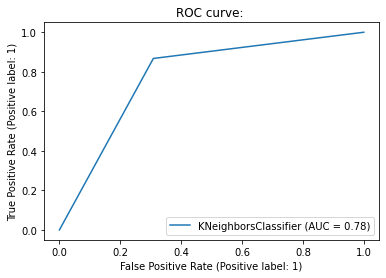

In [55]:
print("Accuracy score:",metrics.accuracy_score(y_test, y_pred_knn_tuned))
print("f1 score :",metrics.f1_score(y_test, y_pred_knn_tuned))
print("f1 score Micro:",metrics.f1_score(y_test, y_pred_knn_tuned,average='micro'))
print("f1 score Macro:",metrics.f1_score(y_test, y_pred_knn_tuned,average='macro'))
print("f1 score Weighted:",metrics.f1_score(y_test, y_pred_knn_tuned,average='weighted'))
print("Precision Score:",metrics.precision_score(y_test, y_pred_knn_tuned))
print("average_precision_score:",metrics.average_precision_score(y_test, y_pred_knn_tuned))
print("balanced_accuracy_score:",metrics.balanced_accuracy_score(y_test, y_pred_knn_tuned))
print("confusion_matrix:",metrics.confusion_matrix(y_test, y_pred_knn_tuned))
print("f1 score:",metrics.f1_score(y_test, y_pred_knn_tuned))
print("recall score:",metrics.recall_score(y_test, y_pred_knn_tuned))
print("ROC AUC Curve:",metrics.roc_auc_score(y_test, y_pred_knn_tuned))
rocCurve = metrics.plot_roc_curve(clf_knn_tuned, X_test, y_test)
rocCurveTitle = 'ROC curve: '
rocCurve.ax_.set_title(rocCurveTitle)

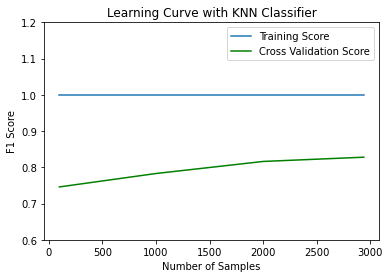

In [56]:
parameter_range = [100,1000,2000,2938]
knn_train_sizes, knn_train_scores, knn_valid_scores,knn_fit_times,knn_score_times = learning_curve(clf_knn_tuned, X_train, y_train, train_sizes=parameter_range, cv=5, scoring='f1',n_jobs=5,return_times=True)

# Mean deviation of train score
mean_train_score = np.mean(knn_train_scores, axis = 1)
 
# Mean deviation of testing score
mean_test_score = np.mean(knn_valid_scores, axis = 1)
 
# Plot mean F1 scores for training and testing scores
plt.plot(knn_train_sizes,mean_train_score,label='Training Score')
plt.plot(knn_train_sizes,mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Learning Curve with KNN Classifier")
plt.xlabel("Number of Samples")
plt.ylabel("F1 Score")
plt.legend(loc = 'best')
plt.ylim(0.6, 1.2)
plt.show()

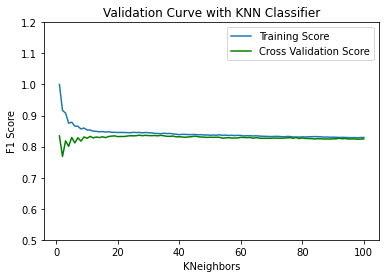

In [57]:
neighborsParam = np.arange(1, 101)
train_scores, test_scores = validation_curve(clf_knn, X_train, y_train, param_name="n_neighbors", 
                                             param_range=neighborsParam, scoring='f1', cv=5)
mean_train_score = np.mean(train_scores, axis = 1)
 
# Calculating mean  deviation of testing score
mean_test_score = np.mean(test_scores, axis = 1)
 
# Plot mean F1 scores for training and testing scores
plt.plot(neighborsParam,mean_train_score,label='Training Score')
plt.plot(neighborsParam,mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with KNN Classifier")
plt.xlabel("KNeighbors")
plt.ylabel("F1 Score")
plt.legend(loc = 'best')
plt.ylim(0.5, 1.2)
plt.show()

#### Models score times comparison

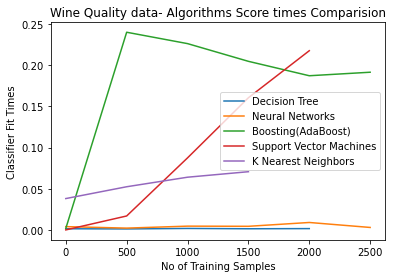

In [61]:
train_sizes = np.arange(start=0, stop=2900, step=500)
data = pd.DataFrame({'DecisionTree':pd.Series(np.mean(dt_score_times, axis=1)), 'NeuralNetworks':pd.Series(np.mean(nn_score_times, axis=1)), 
                     'Boosting':pd.Series(np.mean(adaboost_score_times, axis=1)), 'SVM':pd.Series(np.mean(svm_score_times, axis=1)), 
                     'KNN':pd.Series(np.mean(knn_score_times, axis=1)), 'TrainingExamples':pd.Series(train_sizes) })
plt.plot('TrainingExamples','DecisionTree', data=data, label='Decision Tree')
plt.plot('TrainingExamples','NeuralNetworks', data=data, label='Neural Networks')
plt.plot('TrainingExamples','Boosting', data=data, label='Boosting(AdaBoost)')
plt.plot('TrainingExamples','SVM', data=data, label='Support Vector Machines')
plt.plot('TrainingExamples','KNN', data=data, label='K Nearest Neighbors')
plt.xlabel('No of Training Samples')
plt.ylabel('Classifier Fit Times')
plt.title('Wine Quality data- Algorithms Score times Comparision')
plt.legend(loc="best")
plt.legend()

#### Models fit times comparison

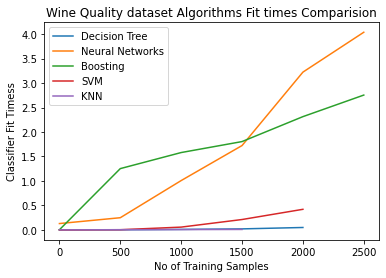

In [62]:
train_sizes = np.arange(start=0, stop=2900, step=500)
data = pd.DataFrame({'DecisionTree':pd.Series(np.mean(dt_fit_times, axis=1)), 'NeuralNetworks':pd.Series(np.mean(nn_fit_times, axis=1)), 
                     'Boosting':pd.Series(np.mean(adaboost_fit_times, axis=1)), 'SVM':pd.Series(np.mean(svm_fit_times, axis=1)), 
                     'KNN':pd.Series(np.mean(knn_fit_times, axis=1)), 'TrainingExamples':pd.Series(train_sizes) })
plt.plot('TrainingExamples','DecisionTree', data=data, label='Decision Tree')
plt.plot('TrainingExamples','NeuralNetworks', data=data, label='Neural Networks')
plt.plot('TrainingExamples','Boosting', data=data, label='Boosting')
plt.plot('TrainingExamples','SVM', data=data, label='SVM')
plt.plot('TrainingExamples','KNN', data=data, label='KNN')
plt.xlabel('No of Training Samples')
plt.ylabel('Classifier Fit Timess')
plt.title('Wine Quality dataset Algorithms Fit times Comparision')
plt.legend(loc="best")
plt.legend()